In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [24]:
train_data=pd.read_csv(r'C:\Users\user\Desktop\데이터분석\220203 프로젝트1_titanic\train.csv')

In [25]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Datasets with null values='Age', 'Cabin', 'Embarked'

### Survival rate

Text(0.5, 1.0, 'Survived')

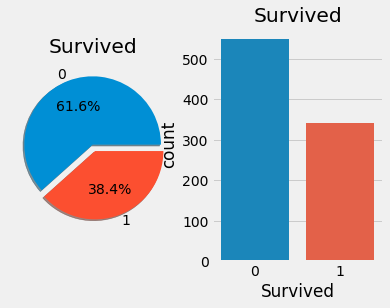

In [26]:
f, ax=plt.subplots(1, 2)
train_data['Survived'].value_counts().plot.pie(ax=ax[0], shadow=True, explode=[0,0.1], autopct='%1.1f%%')
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train_data, ax=ax[1])
ax[1].set_title('Survived')

Only 38.4% survived. What features affected survival rates?

## (1)Feature analysis

### (1.1)Sex(Categorical feature)

In [27]:
train_data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Women were more likely to have survived than men

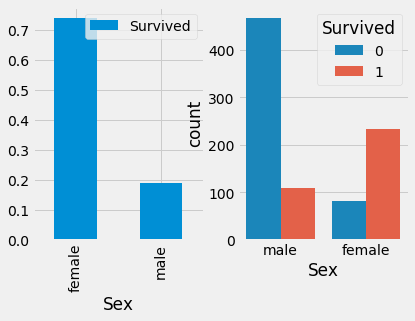

In [34]:
f, ax=plt.subplots(1, 2)
train_data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
sns.countplot('Sex', hue='Survived', data=train_data, ax=ax[1])

The righr graph proves that although the number of males on ship was higher than that of women; yet the right graph shows that the likeliness of women survival is higher.

### (1.2) Pclass(Ordinal feature)

In [41]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Passengers at Pclass3(cheapest class) showed highest death toll, while passengers at Pclass1(most expensive class) showed lowest death toll.

Text(0.5, 1.0, 'Numver of passengers by Pclass')

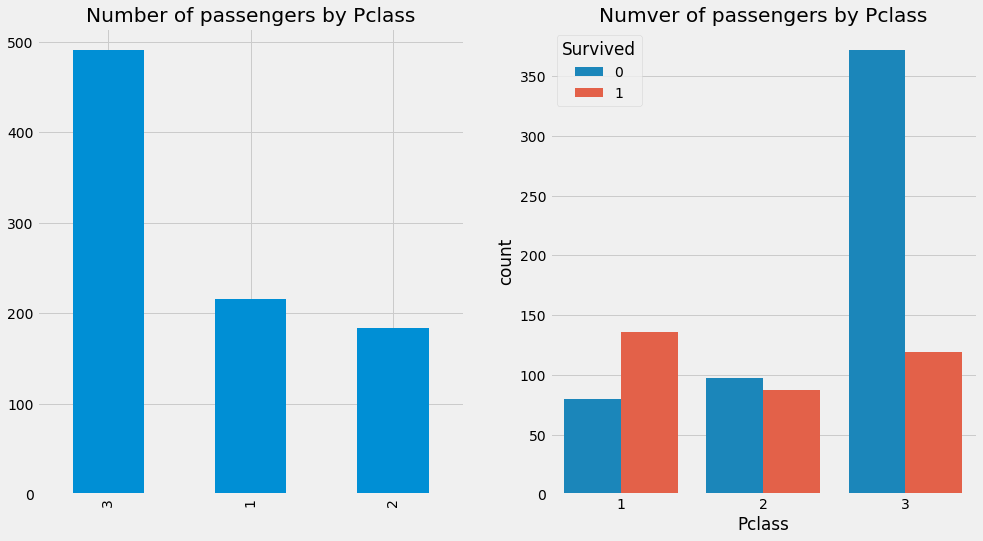

In [47]:
f, ax=plt.subplots(1, 2, figsize=(15, 8))
train_data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers by Pclass')
sns.countplot('Pclass', hue='Survived', data=train_data, ax=ax[1])
ax[1].set_title('Numver of passengers by Pclass')

Pclass3 survival rate is the lowest(approxmately 25%), Pclass1 survival rate is highest(approximately 60%), Pclass2 survival rate is around 40%.

### (1.3) Sex& Pclass

In [48]:
pd.crosstab([train_data.Sex, train_data.Survived], train_data.Pclass, margins=True).style.background_gradient(cmap='cool')

Males in all three Pclass were more likely to die(men died more than females in all three Pclass); while women in all three Pclass were more likely to survive(only 3 females from Pclass1 died)

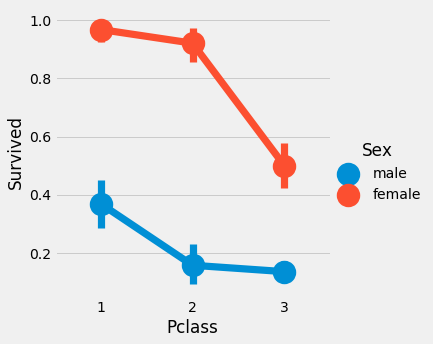

In [51]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)

Women from Pclass1 showed almost 100% of survival rate while males showed less than 40% of survival rates max.

### (1.4)Age(Continuous features)

Text(0.5, 1.0, 'How Sex, Age affect survival rate')

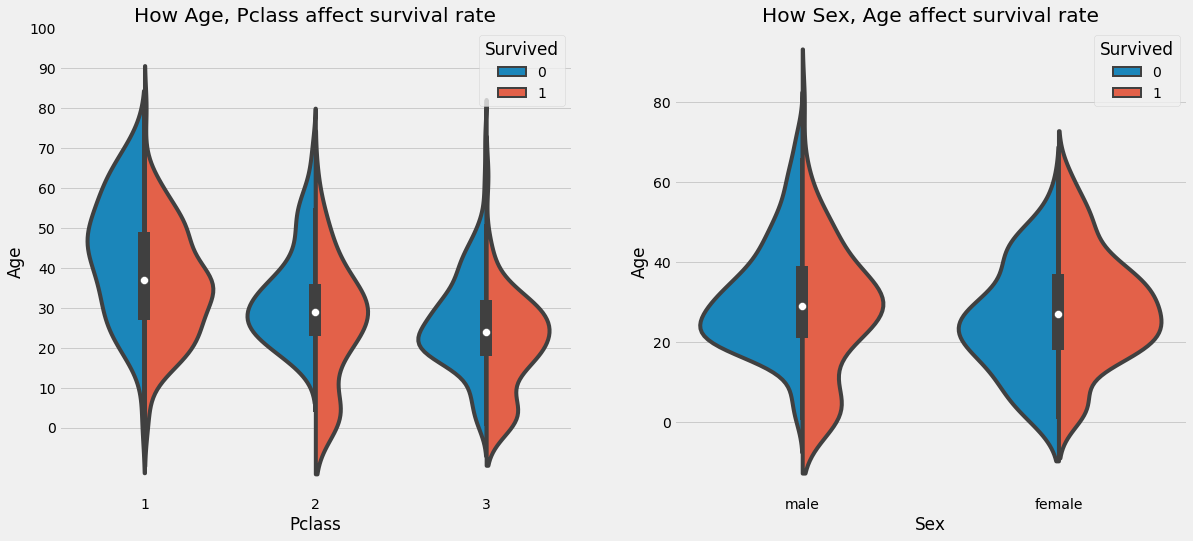

In [63]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=train_data, ax=ax[0],split=True)
ax[0].set_yticks(range(0,110, 10))
ax[0].set_title('How Age, Pclass affect survival rate')

sns.violinplot('Sex', 'Age', hue='Survived', data=train_data, split=True, ax=ax[1])
ax[1].set_title('How Sex, Age affect survival rate')

##### Observation

(1) Younger people took cheaper Pclass while older people took more expensive Pclass.

(2) Age below 20 showed high chance of survival regardless of Pclass and Sex.

### (1.5) SibSip(Discrete feature)

How having companies affect survival. 

SibSip=Sibling+Spouse 

In [143]:
pd.crosstab([train_data.SibSp], train_data.Survived).style.background_gradient(cmap='cool')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'How having siblings or spouses affect survival rate')

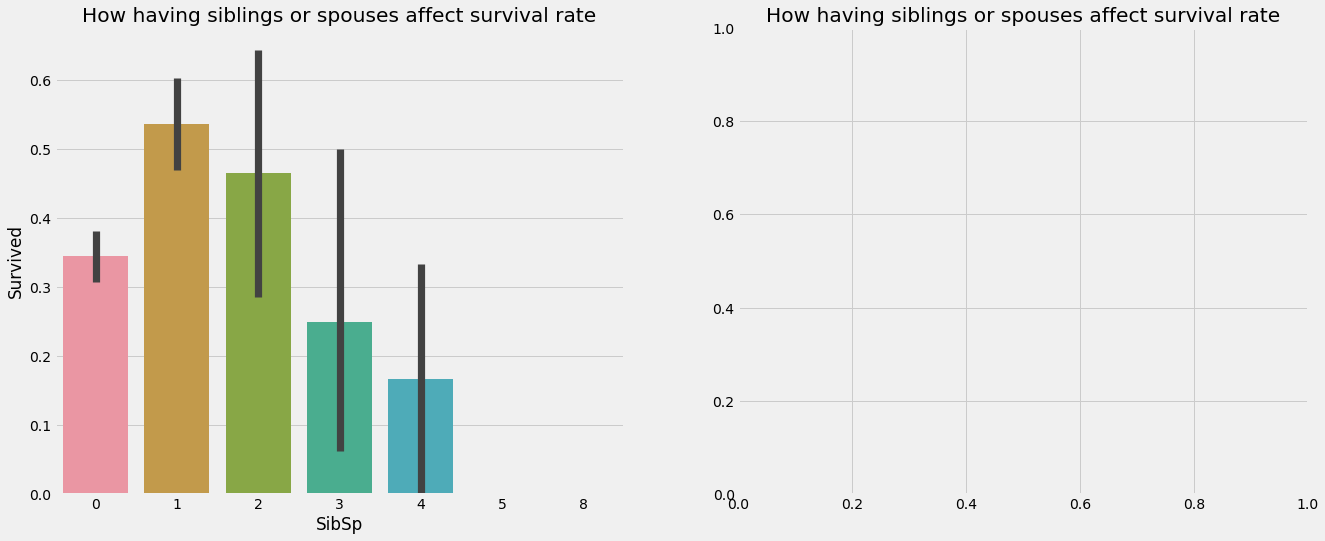

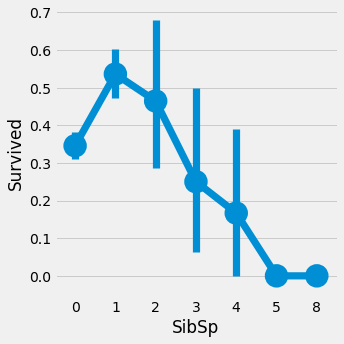

In [184]:
f, ax=plt.subplots(1,2, figsize=(20,8))
sns.barplot('SibSp','Survived', data=train_data, ax=ax[0])
ax[0].set_title('How having siblings or spouses affect survival rate')
sns.factorplot('SibSp','Survived', data=train_data, ax=ax[1])
ax[1].set_title('How having siblings or spouses affect survival rate')


Having more than 1 companies negatively affect the survival rates; especially, the passengers with over 5-8 companies showed 0% of survival. Why?

In [185]:
pd.crosstab([train_data.SibSp], train_data.Pclass).style.background_gradient(cmap='cool')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


People in Pclass3 had more number of companies while people in Pclass 1 and 2 had no companies that exceeds 3 people at most. That's why the survival rates were negatively influenced by the company number.

### (1.6) Parch(Discrete feature)

In [187]:
pd.crosstab([train_data.Parch], train_data.Pclass).style.background_gradient(cmap='cool')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'How having parents and children affect survival rates')

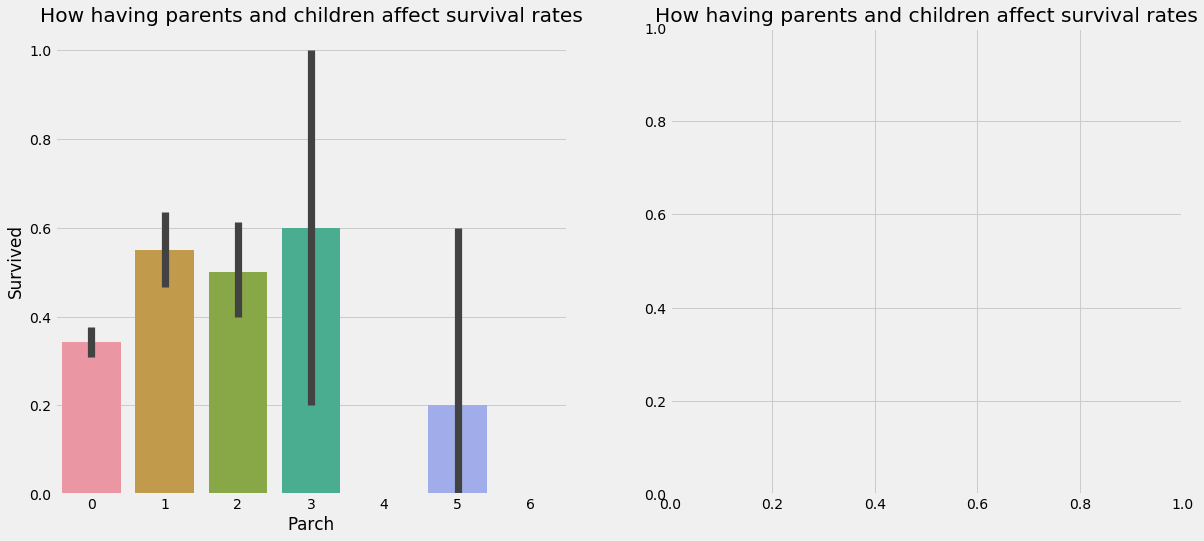

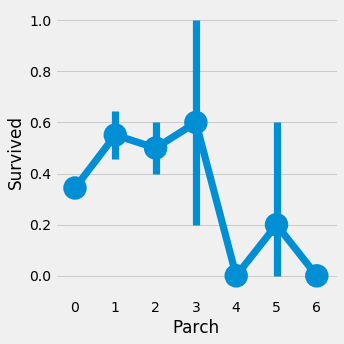

In [192]:
f, ax=plt.subplots(1,2, figsize=(18, 8))
sns.barplot('Parch', 'Survived', data=train_data, ax=ax[0])
ax[0].set_title('How having parents and children affect survival rates')

sns.factorplot('Parch','Survived', data=train_data, ax=ax[1])
ax[1].set_title('How having parents and children affect survival rates')


Having parents and children increases survival rates; however, having over 4 parents or children decreases chance of survival.

### (1.7) Fare(Continuous feature)

In [195]:
print(train_data['Fare'].max())
print(train_data['Fare'].min())
print(train_data['Fare'].mean())

512.3292
0.0
32.2042079685746


The minum fare a passenger paid is 0, the maximum fare is 512, and the mean fare is 32.

Text(0.5, 1.0, 'Fares for Pclass3')

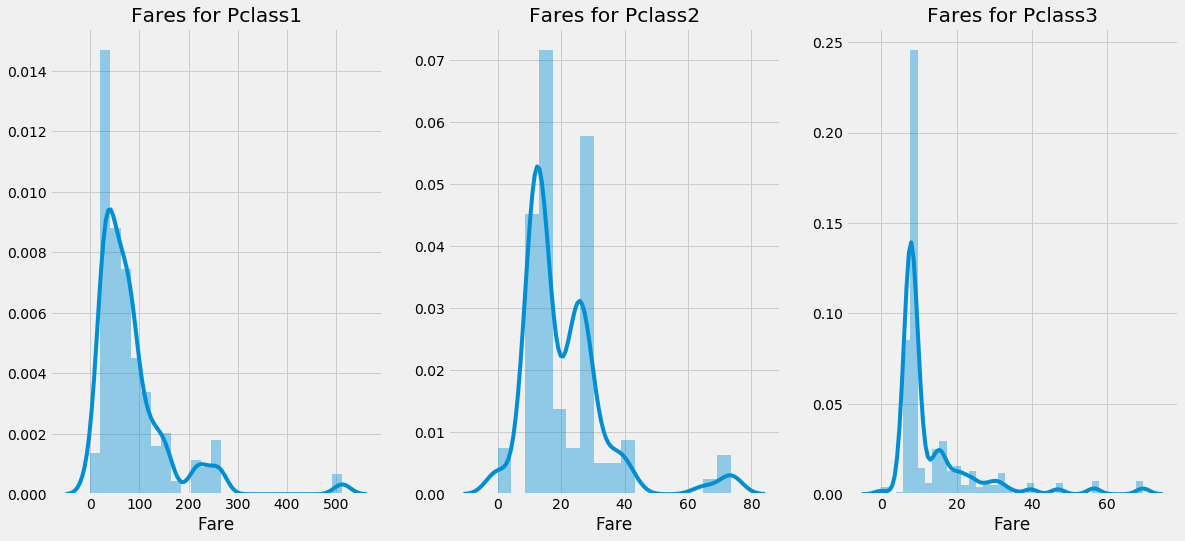

In [200]:
f, ax=plt.subplots(1,3, figsize=(18,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares for Pclass1')

sns.distplot(train_data[train_data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares for Pclass2')

sns.distplot(train_data[train_data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares for Pclass3')

Pclass1 has the most wide price range by ranging from 0 to 500; while Pclass3 has less price distribution(ranging from 0 to 60)

### Conclusion: Feature analysis

1) Sex=Women more likely to survive than men.

2) Pclass=Pclass1 passengers are more likely to survive than Pclass3 passengers.

3) Age=Age below 20 showed high chance of survival regardless of Pclass and Sex.

4) Embarked=People from PortC were more likely to have survived than killed since many of them are from Pclass1. And people embarked from PortQ were all from Pclass3.

5) SibSp=Having more than 1 companies negatively affect the survival rates; especially, the passengers with over 5-8 companies showed 0% of survival.

6) Parch=Having parents and children increases survival rates; however, having over 4 parents or children decreases chance of survival

### Correlation between Features

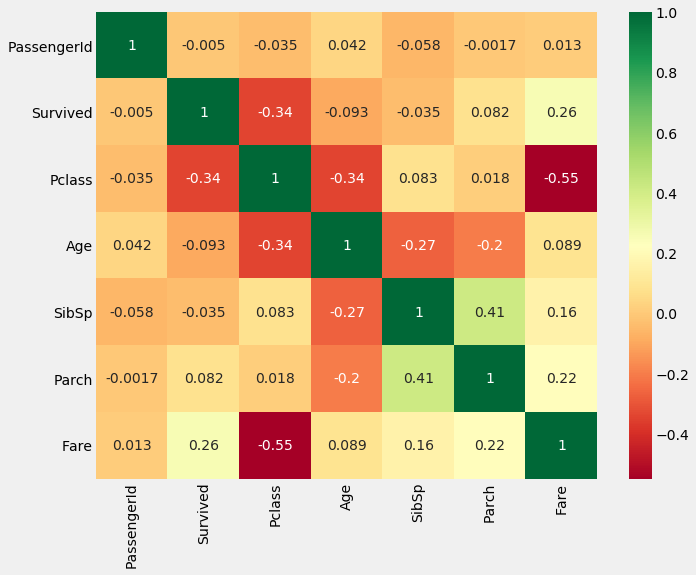

In [212]:
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')
#'.corr()'=> heatmap matrix
fig=plt.gcf()
#'plt.gcf()'이게 있어야만 히트맵 글자 수 크기 조절 가능
fig.set_size_inches(10,8)

If there is overly similar features that means both features contain redundant information, in this case I should eliminate redundant features before training a model.

The features with the highest correlation is 'Fare-Pclass' and 'Parch-SibSp', so the features are not much correlated, so there is no redundant information.

## 2. Fill null data

### Use of Name(Mr, Mrs, Ms, Doctor, etc) to guess age for null data

Extract initials from train_data.

In [76]:
train_data['Initial']=0
#Created a new column called 'Initial'
for i in train_data:
    train_data['Initial']=train_data.Name.str.extract('([A-Za-z]+)\.')
#extracting string(text) from 'Name' which lie between A to Z, a to z(so every letter) followed by a .(dot)

In [79]:
pd.crosstab(train_data.Initial, train_data.Sex).T.style.background_gradient(cmap='cool')
#T.style=x축, y축 역전

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Categorize multiple initials into a few simpler columns.

In [83]:
train_data['Initial'].replace(['Capt', 'Col', 'Countess', 'Don','Dr','Jonkheer','Lady','Major','Miss','Mlle','Mme','Mr','Mrs','Ms','Rev','Sir'],
                              ['Mr', 'Other', 'Mrs', 'Mr','Mr','Other','Ms','Mr','Ms','Ms','Ms','Mr','Mrs','Ms','Other','Mr'], inplace=True)

Checking mean data for each categories

In [85]:
train_data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Mr        32.739609
Mrs       35.871560
Ms        22.033113
Other     45.888889
Name: Age, dtype: float64

### (2. 1) Filling null Age data

Assigning mean age to null data

In [95]:
train_data.loc[(train_data.Age.isnull())& (train_data.Initial=='Master'), 'Age']=5
train_data.loc[(train_data.Age.isnull())& (train_data.Initial=='Mr'), 'Age']=33
train_data.loc[(train_data.Age.isnull())& (train_data.Initial=='Mrs'), 'Age']=35
train_data.loc[(train_data.Age.isnull())& (train_data.Initial=='Ms'), 'Age']=22
train_data.loc[(train_data.Age.isnull())& (train_data.Initial=='Other'), 'Age']=45

In [96]:
train_data.Age.isnull().any()

False

Text(0.5, 1.0, 'Number of survived people by age')

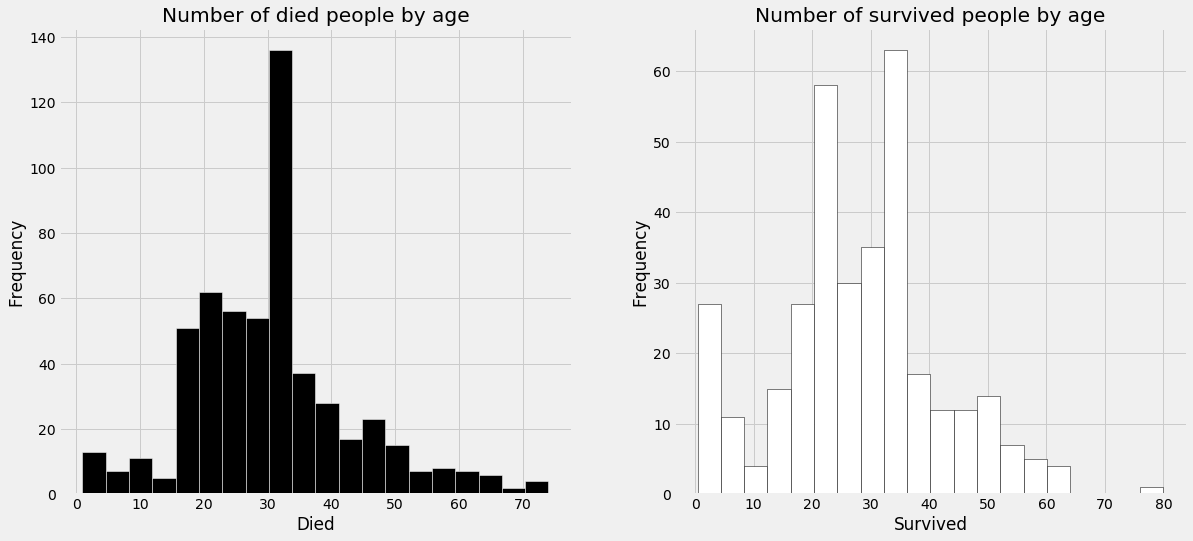

In [111]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, color='black', edgecolor='white')
ax[0].set_xlabel('Age')
ax[0].set_xlabel('Died')
ax[0].set_title('Number of died people by age')
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1], bins=20, color='white', edgecolor='black')
ax[1].set_xlabel('Age')
ax[1].set_xlabel('Survived')
ax[1].set_title('Number of survived people by age')

(1) Aged before 10 showed high survival rate

(2) People aged between 30 to 40 showed highest death rate

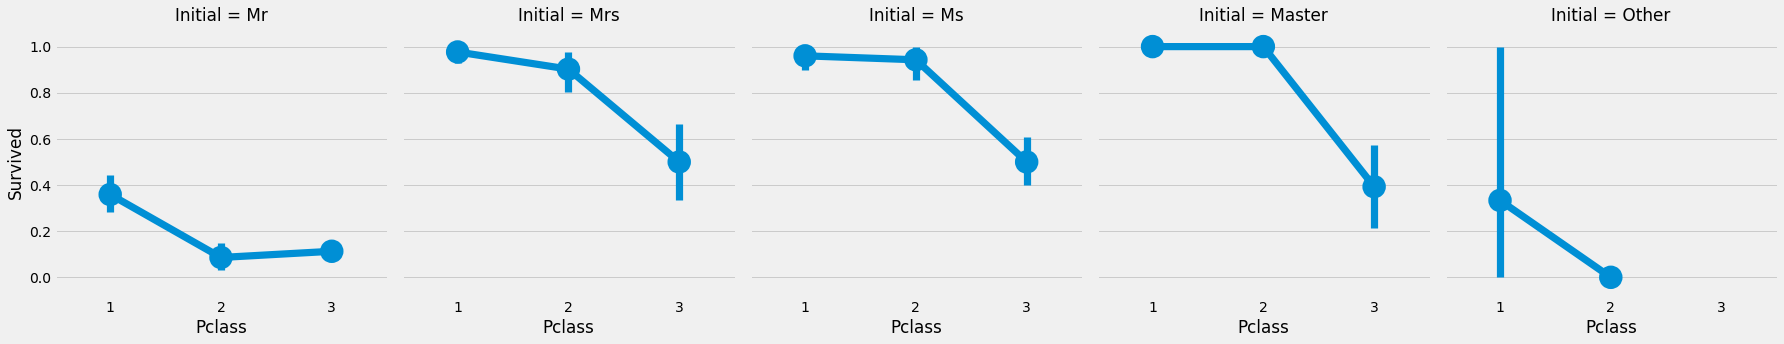

In [113]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=train_data, figsize=(18, 8))

Ms and Master showed high survival rate; Mr showed lowest survival rate

## (2. 2) Filling Embarked null data

### (2.2. 1)Embarked data analysis: What kind of passengers embarked from different ports.

In [116]:
pd.crosstab([train_data.Embarked,train_data.Pclass],[train_data.Sex, train_data.Survived], margins=True).style.background_gradient(cmap='cool')

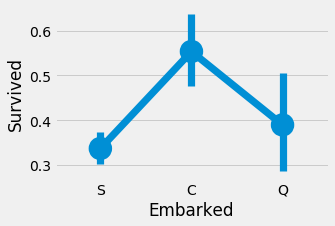

In [125]:
sns.factorplot('Embarked', 'Survived',data=train_data)
fig=plt.gcf()
fig.set_size_inches(5,3)

Passengers from portC showed over 50% of survival while passengers from port S showed 35% of survival.

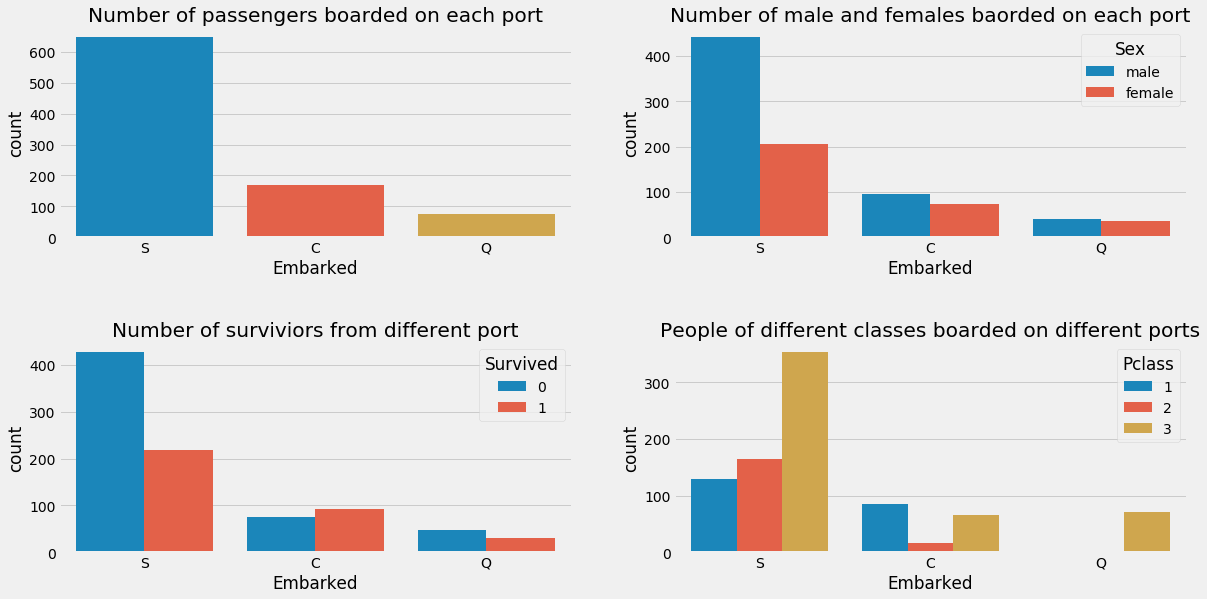

In [201]:
f, ax=plt.subplots(2,2, figsize=(18, 9))
sns.countplot('Embarked', data=train_data, ax=ax[0, 0])
ax[0,0].set_title('Number of passengers boarded on each port')

sns.countplot('Embarked', hue='Sex', data=train_data, ax=ax[0,1])
ax[0,1].set_title('Number of male and females baorded on each port')

sns.countplot('Embarked', hue='Survived', data=train_data, ax=ax[1,0])
ax[1,0].set_title('Number of surviviors from different port')

sns.countplot('Embarked', hue='Pclass', data=train_data, ax=ax[1,1])
ax[1,1].set_title('People of different classes boarded on different ports')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

People from PortC were more likely to have survived than killed since many of them are from Pclass1.

People from PortS had low survival rate despite many Pclass1 people because there were many people fro Pclass3.

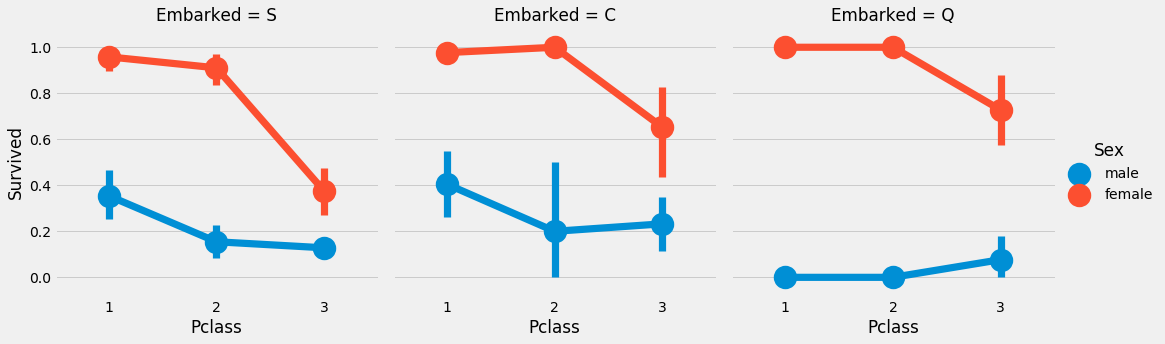

In [132]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=train_data)
fig.set_size_inches(18,8)

(1) Survival rates for women in Pclass 1 and 2 are almost 1.

(2) People boarded at PortS showed less likeliness of survival for both men and women.

(3) Seems likely that no one from Pclass 1,2 embarked from PortQ.

### (2.2.2)Filling out Embarked null data

From the data analysis above, most people boarded from the port S. So it is most likely that the people boarded from the Port S.

So, we should fill out 2 null data for Embarked to PortS.

In [135]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [136]:
train_data['Embarked'].fillna('S', inplace=True)

In [137]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

Now we fill out all the null data. Cabin null data are the room number which has no relationship with the survival. Therefore, I don't need to fill out Cabin null data.

## Data categorization()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


## Data categorization

### Age categorization

'Age' is a continous feature, in order to do machine learning I need to make it into categorical feature by Binning(Grouping)

In [213]:
print(train_data['Age'].max())
print(train_data['Age'].min())
print(train_data['Age'].mean())

80.0
0.42
29.822861952861953


The maximum age is 80 and the minimum is 0. Therefore, let's divide the range from 0 to 80 into 8 bins. So bins of size 10.

In [214]:
train_data['Age_band']=0
#Creating a 'Age_band' column

In [217]:
train_data.loc[train_data['Age']<=10, 'Age_band']=0
train_data.loc[(train_data['Age']>10)&(train_data['Age']<=20),'Age_band']=1
train_data.loc[(train_data['Age']>20)&(train_data['Age']<=30),'Age_band']=2
train_data.loc[(train_data['Age']>30)&(train_data['Age']<=40),'Age_band']=3
train_data.loc[(train_data['Age']>40)&(train_data['Age']<=50),'Age_band']=4
train_data.loc[(train_data['Age']>50)&(train_data['Age']<=60),'Age_band']=5
train_data.loc[(train_data['Age']>60)&(train_data['Age']<=70),'Age_band']=6
train_data.loc[train_data['Age']>70, 'Age_band']=7


In [219]:
train_data['Age_band'].value_counts().to_frame()

,Age_band
3,292
2,266
1,115
4,86
0,68
5,42
6,17
7,5


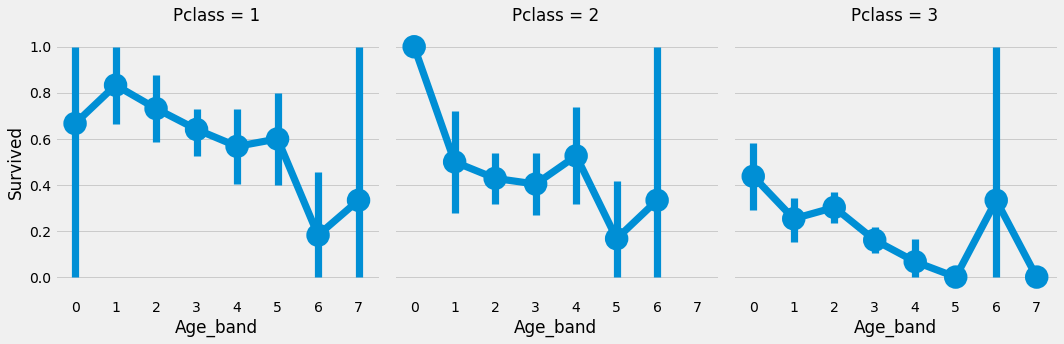

In [221]:
sns.factorplot('Age_band', 'Survived', data=train_data, col='Pclass')

The survival rate decreases as the age band increases ragardless of the class.

### Fare categorization

Fare is also a continuous feature so needs to change to ordinal feature.(More fare the passenger pays, higher the passenger is likely to survive)

In [223]:
train_data['Fare_Range']=pd.qcut(data['Fare'], 4)
# pandas.qcut splits the values according the number of bins we have passed. 
# So we are arranging the values equally spaced into 4 seperate bins.

In [225]:
train_data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='cool')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


The gradient suggests that higher fare leads to higher survival rates.

Now need to categorize the Fare data to 4 bins.

In [226]:
train_data['Fare_cat']=0

In [227]:
train_data.loc[train_data['Fare']<=7.91, 'Fare_cat']=0
train_data.loc[(train_data['Fare']>7.91)&(train_data['Fare']<=14.454),'Fare_cat']=1
train_data.loc[(train_data['Fare']>14.454)&(train_data['Fare']<=31),'Fare_cat']=2
train_data.loc[(train_data['Fare']>31)&(train_data['Fare']<=512.329),'Fare_cat']=3

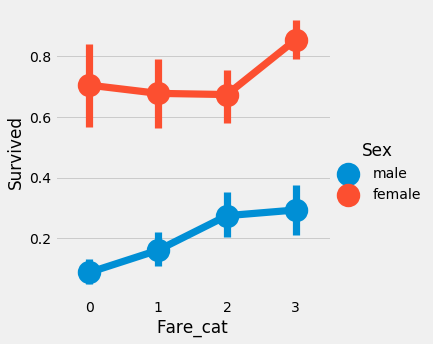

In [228]:
sns.factorplot('Fare_cat', 'Survived', data=train_data, hue='Sex')

As the Fare_cat increases, the survival rate increases as well.

### Parch, SibSp categorization into FamilySize

In [251]:
train_data['FamilySize']=0

In [252]:
train_data['FamilySize']=train_data['Parch']+train_data['SibSp']

In [254]:
train_data['Alone']=0
train_data.loc[train_data.FamilySize==0, 'Alone']=1

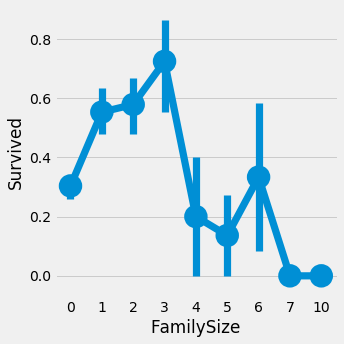

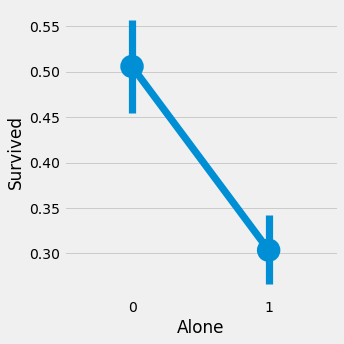

In [263]:
f, ax=plt.subplots(1, 2, figsize=(18, 6))
sns.factorplot('FamilySize', 'Survived', data=train_data, ax=ax[0])
ax[0].set_title('How Family size affect survival rates')

sns.factorplot('Alone', 'Survived', data=train_data, ax=ax[1])
ax[1].set_title('How being alone affect survival rates')

plt.close(0)
plt.close(1)

### String values(Sex, Embarked, Initials) into Numeric values

For machine leanring, need to switch the string values to numeric values

In [239]:
train_data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
train_data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)


TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [242]:
train_data['Initial'].replace(['Mr', 'Mrs', 'Ms', 'Master', 'Other'], [0,1, 2, 3, 4], inplace=True)

### Dropping redundant Features

Redundant Feature: Name, Ticket, Fare(have Fare_cat), Cabin, Fare_Range(Have Fare_cat instead), PassenerID

In [265]:
list(train_data.columns.values)

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Embarked',
 'Initial',
 'Age_band',
 'Fare_cat',
 'FamilySize',
 'Alone']

In [249]:
train_data.drop(['Name', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

In [264]:
list(train_data.columns.values)

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Embarked',
 'Initial',
 'Age_band',
 'Fare_cat',
 'FamilySize',
 'Alone']

In [266]:
train_data.drop(['Age'], axis=1, inplace=True)

In [267]:
list(train_data.columns.values)

['Survived',
 'Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Initial',
 'Age_band',
 'Fare_cat',
 'FamilySize',
 'Alone']

## Machine learning

### Import sklearn

In [270]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression
from sklearn import svm
#Support Vector Machines(Linear and radial)
from sklearn.ensemble import RandomForestClassifier
#Random Forest
from sklearn.neighbors import KNeighborsClassifier
#KNN
from sklearn.naive_bayes import GaussianNB
#Naive bayes
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
from sklearn.model_selection import train_test_split
#training and testing data split
from sklearn import metrics
#accuracy measure
from sklearn.metrics import confusion_matrix

### Spliting train dataset to Train data, Test data(7:3)

In [271]:
train, test=train_test_split(train_data, test_size=0.3, random_state=0, stratify=train_data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=train_data[train_data.columns[1:]]
Y=train_data['Survived']

#### Radical Support Vector Machines(rbf-SVM)

In [274]:
model=svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print(metrics.accuracy_score(prediction1, test_Y))

0.832089552238806


Accuracy of SVM model is 83%

#### Linear Support Vector Machine

In [276]:
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2=model.predict(test_X)
print(metrics.accuracy_score(prediction2, test_Y))

0.8171641791044776


Accuracy of linear  SVM model is 81.7%

#### Logistic regression

In [277]:
model=LogisticRegression()
model.fit(train_X, train_Y)
prediction3=model.predict(test_X)
print(metrics.accuracy_score(prediction3, test_Y))

0.8283582089552238


Accuracy of linear  Logistic regression model is 82.8%

#### Decision Tree

In [278]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print(metrics.accuracy_score(prediction4, test_Y))

0.8097014925373134


Accuracy of linear Decision tree model is 80.9%

#### K-Nearest Neighbours(KNN)

In [279]:
model=KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5=model.predict(test_X)
print(metrics.accuracy_score(prediction5, test_Y))

0.8171641791044776


Accuracy of linear KNN model is 81.7%

KNN은 근처 결과들 보고 비슷한 결과 선택하는 거임; therefore, the accuracies of model varies depend on the number of neighbors. The default value of neighbors is 5. Let's check how changing the value affect the accuracy of the model.

Accuracies for different values of N: [0.7238806  0.76119403 0.81343284 0.76492537 0.81716418 0.82089552
 0.85074627 0.83955224 0.8358209  0.83208955] Max value is 0.8507462686567164


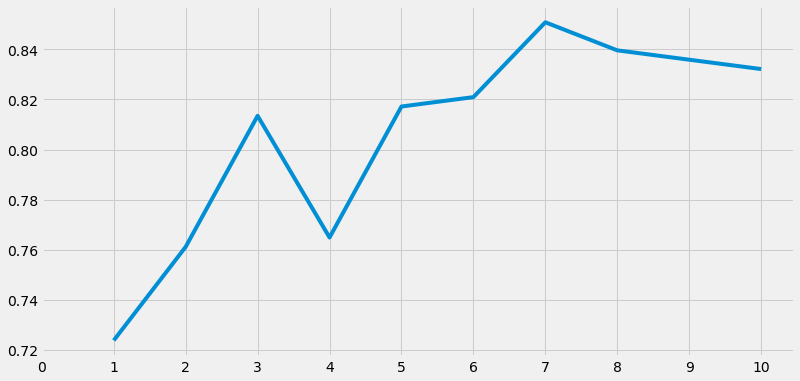

In [287]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)

print('Accuracies for different values of N:', a.values, 'Max value is', a.values.max())

Therefore, the most accuracte number of neighbors=7

#### Gaussian Naive Bayes

In [288]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print(metrics.accuracy_score(prediction, test_Y))

0.832089552238806


Accuracy of linear KNN model is 83.2%

#### Random Forest

In [290]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print(metrics.accuracy_score(prediction7, test_Y))

0.8134328358208955


Accuracy of linear Random forest model is 81.3%

## Cross validation

The accuracy of the model will change as the training and testing data changes. Therefore, we should use the cross validation to increase accuracy.

The datasets are usually imbalanced. Therefore, we use K-Fold Cross Validation model.

(1) K-Fold Validations first divide the dataset into K number.

(2) For example, if K=5 we divided the dataset into 5 parts and reserve 1 part for testing and train the model with other 4 parts.

(3) We continue the process by changing the test part and training the model over other parts.

### Import model

In [292]:
from sklearn.model_selection import KFold
#import K-Fold
from sklearn.model_selection import cross_val_score
#import score validation
from sklearn.model_selection import cross_val_predict
#import prediction
kfold=KFold(n_splits=10, random_state=22)
#k=10, spliting the dataset into 10 different sets.

### Applying cross validation to different models

In [329]:
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear SVM', 'Radial SVM', 'Logistics Regresson', 'KNN', 'Decision Tree', 
            'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=7),
       DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model=i
    cv_result=cross_val_score(model, X, Y, cv=kfold,scoring='accuracy')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2
    

,CV Mean,Std
Linear SVM,0.792347,0.044817
Radial SVM,0.827166,0.034488
Logistics Regresson,0.799114,0.023157
KNN,0.803658,0.042003
Decision Tree,0.798027,0.032194
Naive Bayes,0.798015,0.030285
Random Forest,0.809288,0.041486


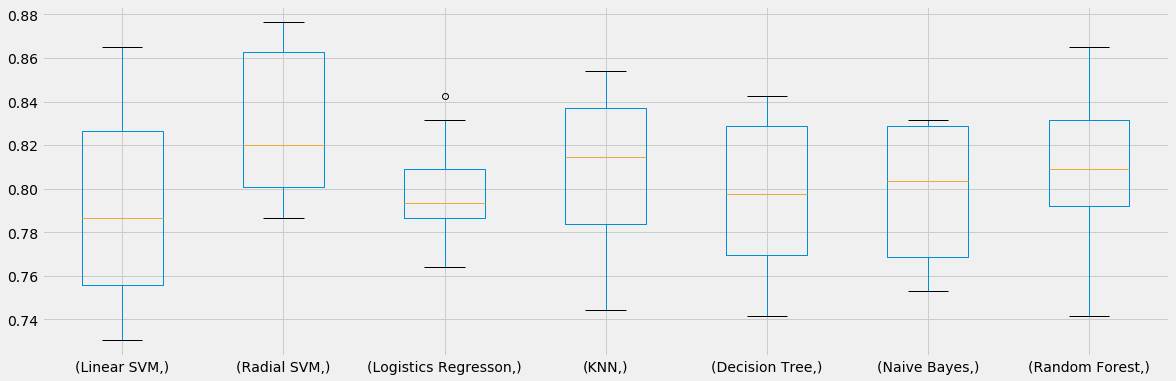

In [303]:
plt.subplots(figsize=(18,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

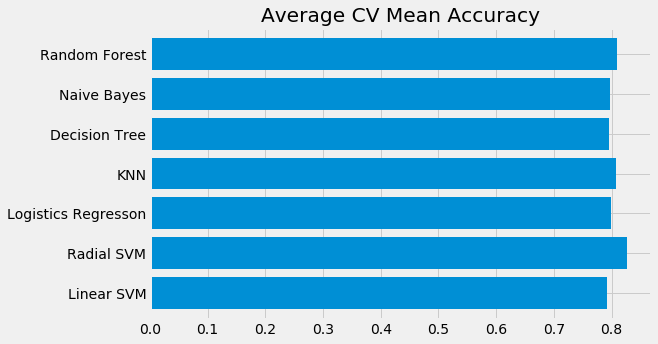

In [305]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)

### Confusion matrix

Use confusion matrix to find out the number of correct and incorrect classifications by the classifier.(각 모델에서 바르게 예측한 수, 잘못 예측한 수 알려줌)

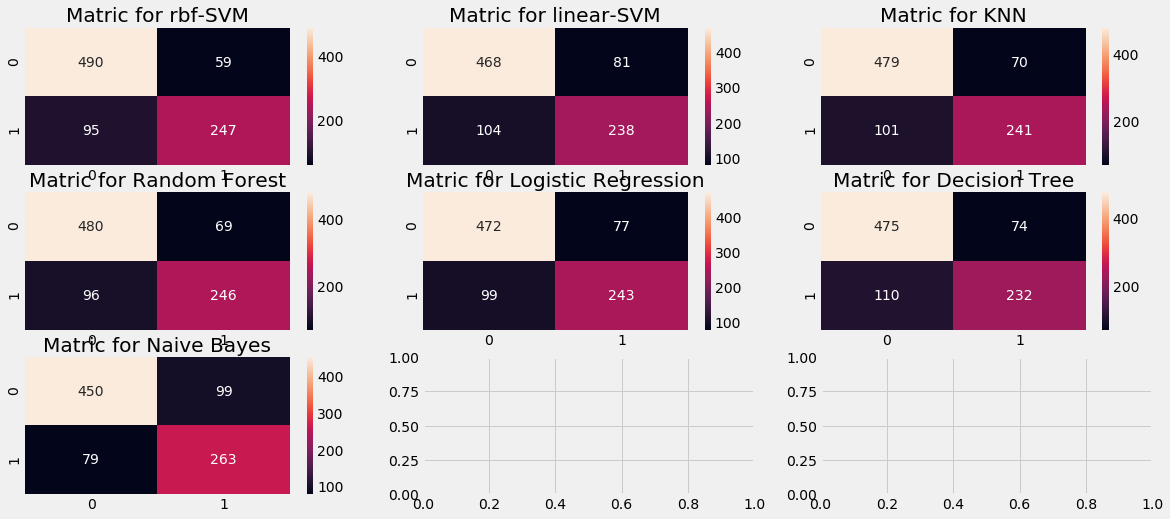

In [315]:
f, ax=plt.subplots(3,3, figsize=(18,8))

y_pred=cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matric for rbf-SVM')

y_pred=cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matric for linear-SVM')

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=7), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0, 2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matric for KNN')

y_pred=cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 0], annot=True, fmt='2.0f')
ax[1, 0].set_title('Matric for Random Forest')

y_pred=cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matric for Logistic Regression')

y_pred=cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1, 2], annot=True, fmt='2.0f')
ax[1, 2].set_title('Matric for Decision Tree')

y_pred=cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2, 0], annot=True, fmt='2.0f')
ax[2, 0].set_title('Matric for Naive Bayes')

plt.subplots_adjust(hspace=0.2, wspace=0.2)

Black colored means Errors and white and red colored means correct prediction.

For instance, according to the matrix for rbf-SVM, correct prediction are 490(correctly predicted dead people)+247(correctly predicted survived people)

Errors: 59 people are wrongly categorized as survived when they are dead.
95 people are wrongly categorized as dead when they have survived.

Therefore, the 'Radial SVM' shows higher chance of correctly predicting the number of dead people. And the 'Naive Bayes' have higher chance of correctly predicting the survived people.

### Hyper-parameter Tunning

Hyper-parameter tunning is to tune the model to get the better result.

#### Hyper-parameter tunning for SVM

In [318]:
from sklearn.model_selection import GridSearchCV

In [320]:
C=[0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
kernel=['rbf', 'linear']
hyper={'kernel': kernel, 'C':C, 'gamma': gamma}
gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293766869625259
SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 1100 out of 1100 | elapsed:   58.3s finished


#### Hyper-parameter tunning for Random Forest

In [322]:
n_estimators=range(100, 1000, 100)
hyper={'n_estimators': n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.9min finished


0.8193459293201932
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


The best score for rbf-SVM=82.94%, C=0.6,gamma=0.2

The best score for Random Forest:81.93%, n_estimators=600

### Ensembling

Ensembling is a combination of models to create a single powerful model.

#### Voting Classifier

The simplest way of combining predictions from different models. It gives an average prediction of all the submodels.

In [328]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=7)),
                                             ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.6, gamma=0.2)),
                                             ('RFor', RandomForestClassifier(n_estimators=600, random_state=0)),
                                             ('LR', LogisticRegression(C=0.05)),
                                             ('DT', DecisionTreeClassifier(random_state=0)),
                                             ('NB', GaussianNB()),
                                             ('svm', svm.SVC(kernel='linear', probability=True))
                                             ],
                                 voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is',ensemble_lin_rbf.score(test_X, test_Y))

cross=cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is 0.8246268656716418
The cross validated score is 0.8148689138576779


#### Bagging

Bagging is a general ensemble model.It applies similar classifiers on smaller datasets and take the average of all the predictions.

##### Bagged KNN

Bagging works best with models with high variance like Decision Tree or Random Forest. We use KNN with small value of n_neighbors as small values of n_neighbors.

In [330]:
from sklearn.ensemble import BaggingClassifier

In [334]:
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The bagged KNN accuracy', metrics.accuracy_score(prediction, test_Y))

result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The bagged KNN cross validated score', result.mean())

The bagged KNN accuracy 0.8246268656716418
The bagged KNN cross validated score 0.8137952559300874


#### Bagged Decision Tree

In [335]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The bagged Decision Tree accuracy', metrics.accuracy_score(prediction, test_Y))

result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The bagged Decision Tree accuracy cross validated score', result.mean())

The bagged Decision Tree accuracy 0.8134328358208955
The bagged Decision Tree accuracy cross validated score 0.8059550561797751


## Boosting

Boosting is to increase prediction of a weak model using ensemble.

(1) A model will first trained on the complete datasets.

(2) A model will focus more on wrong predictions to predict wrong cases more correctly.

(3) A model will add new classifers and iterate process.

### Adaptive Boosting

In [338]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated socre of Adative Boosting', result.mean())

The cross validated socre of Adative Boosting 0.8260299625468164


### Stochastic Gradient Boosting

In [339]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated socre of Stochastic Gradient Boosting', result.mean())

The cross validated socre of Stochastic Gradient Boosting 0.8171660424469411


The Adaptive Boosting have highest accuracy.

### Hyper-Parameter Tunning for Adaptive Boosting

In [344]:
n_estimators=range(100, 1100, 100)
learn_rate=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators': n_estimators, 'learning_rate': learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.4min finished


0.830500282468144
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


The maximum accuracy is using Adaptive Boost 83.05%.
learning_rate=0.1,n_estimators=100

### Confusion Matrix for the Adaptive Boosting model

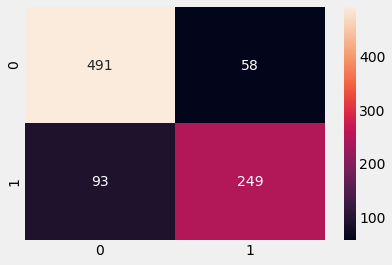

In [354]:
ada=AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y, result), annot=True, fmt='2.0f')
plt.show()

### Featuer Importance

Text(0.5, 1.0, 'Feature Imporatance in Gradient Boosting')

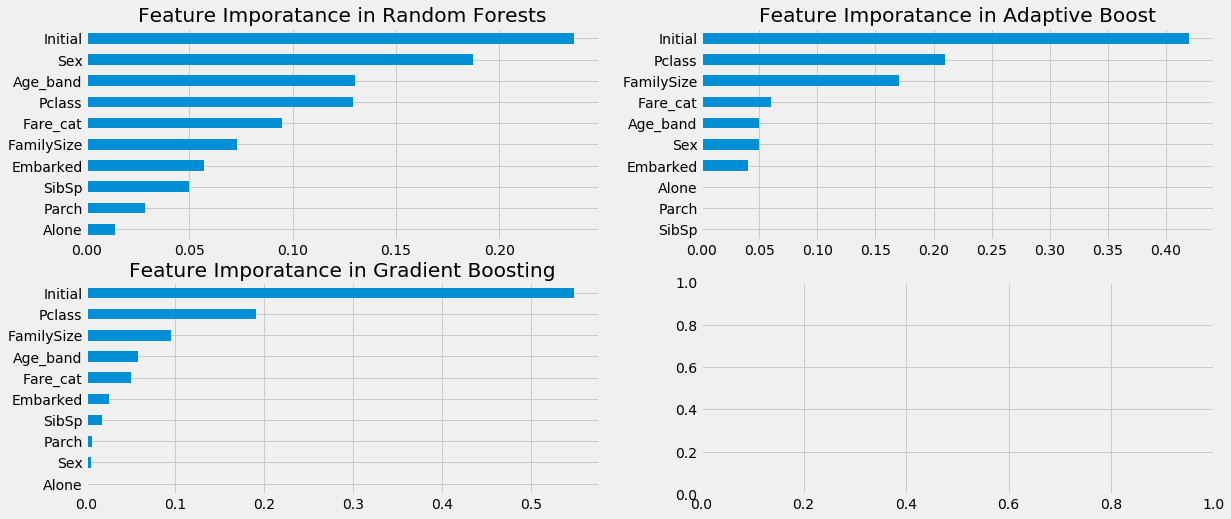

In [347]:
f, ax=plt.subplots(2,2, figsize=(18, 8))

model=RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(ax=ax[0,0])
ax[0,0].set_title('Feature Imporatance in Random Forests')

model=AdaBoostClassifier(n_estimators=100,learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(ax=ax[0,1])
ax[0,1].set_title('Feature Imporatance in Adaptive Boost')


model=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
model.fit(X, Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(ax=ax[1,0])
ax[1,0].set_title('Feature Imporatance in Gradient Boosting')


(1) Initial, Sex, Pclass, FamilySize are importance in all models

(2) Fare_cat doesn't see much important which is shocking; however, we could see that Pclass(which implies the information of Fare_cat) is important.